**STEP 1**

**TO ANALYSE :**
> What are the general features of each of the subspecies of Iris

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/irisdataset/Iris.csv


**LOADING AND UNDERSTANDING THE DATASET**

In [2]:
iris = pd.read_csv('../input/irisdataset/Iris.csv')
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
petal_length    150 non-null float64
petal_width     150 non-null float64
sepal_length    150 non-null float64
sepal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


*The Dataset contains 150 rows each under five attributes and there is no NULL value in Dataset*

In [4]:
iris.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**EXPLORATORY DATA ANALYSIS**

> UNIVARIATE ANALYSIS

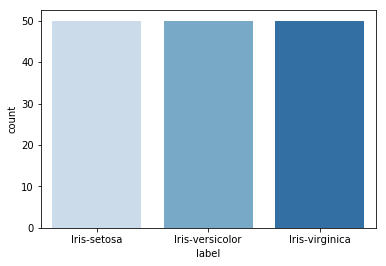

In [5]:
#countplot for each of the labels
sns.countplot(x='label',data=iris, palette = 'Blues')
plt.show()

> Check for OUTLIERS in Data

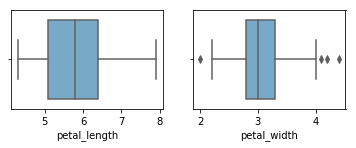

In [6]:
plt.subplot(2,2,1)
sns.boxplot(x = 'petal_length',data = iris, palette ='Blues')

plt.subplot(2,2,2)
sns.boxplot(x = 'petal_width',data = iris, palette ='Blues')

plt.show()

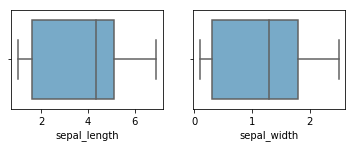

In [7]:
plt.subplot(2,2,1)
sns.boxplot(x = 'sepal_length',data = iris, palette ='Blues')

plt.subplot(2,2,2)
sns.boxplot(x = 'sepal_width',data = iris, palette ='Blues')

plt.show()

*The data seems fine and evenly distributed*

> BIVARIATE ANALYSIS

*From the problem statement it is clear that our target variable for the analysis is 'label'<br>
We will do Bivariate Analysis of each of the attribute with respect to 'label'*

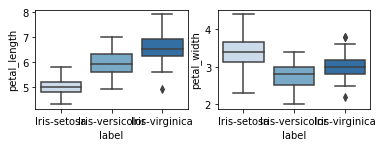

In [8]:
#PETALS

plt.subplot(2,2,1)
sns.boxplot(x='label', y='petal_length', data=iris, palette ='Blues')

plt.subplot(2,2,2)
sns.boxplot(x='label', y='petal_width', data=iris, palette ='Blues')
plt.show()

*We observe that: *
> 'Iris - setosa' has small but wide petals <br>
> 'Iris - versicolor' has petals with medium length and width <br>
> 'Iris - virginica' has lengthy petals with a width a little more than 'Iris - versicolor' <br>

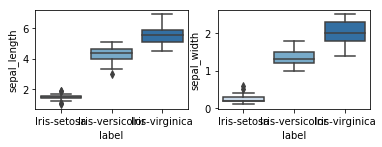

In [9]:
#SEPALS

plt.subplot(2,2,1)
sns.boxplot(x='label', y='sepal_length', data=iris , palette ='Blues')

plt.subplot(2,2,2)
sns.boxplot(x='label', y='sepal_width', data=iris , palette ='Blues')
plt.show()

*We observe that: *
> 'Iris - setosa' has small sepals with small length and width <br>
> 'Iris - versicolor' has sepal with medium length and width <br>
> 'Iris - virginica' has lengthy sepals <br>

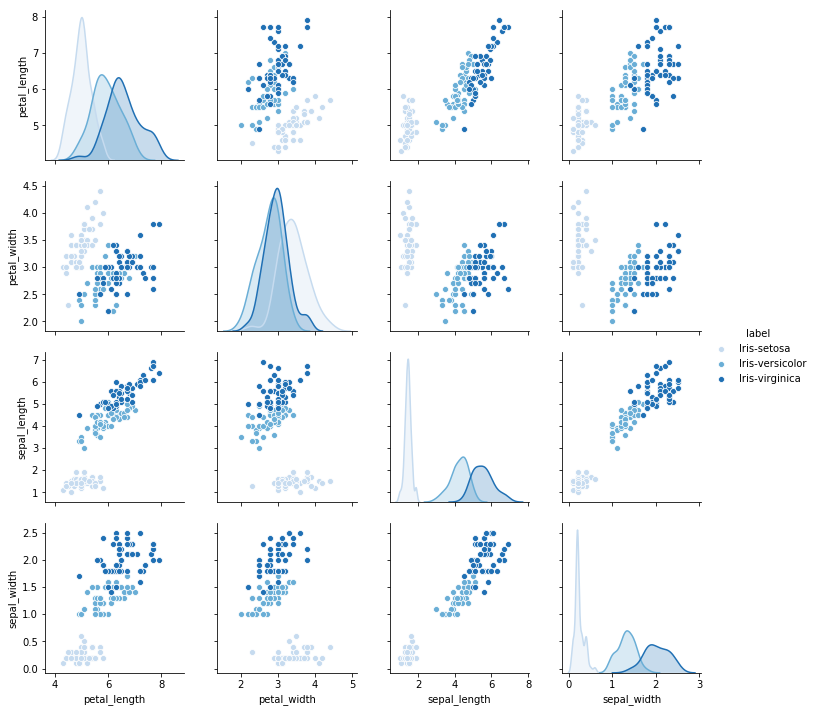

In [10]:
colors = ["windows blue", "amber", "greyish","dusty purple"]
sns.pairplot(iris, hue='label',palette = 'Blues')
plt.show()

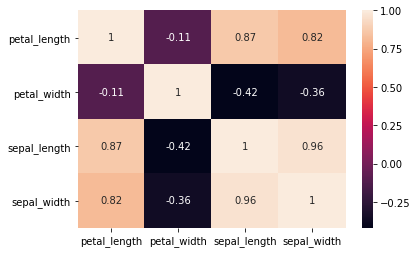

In [11]:
sns.heatmap(iris.corr(),annot = True)
plt.show()

*We Observe That:*<br>
> -Sepal Length and Sepal Width have a strong positive correlation with Petal Length while Petal width has negative correlation with Petal Length. Hence usually when Petal Length is large the petal width will be less and sepal length and width increase with increase in Petal Length.<br>
> -Petal width has negative correlation with sepal width and sepal length that is iris with wide petals will usually have small sepal width and sepal length.<br>
>-Sepal length has a positive correlation with Sepal width so usually if iris has wide sepals then those sepals will be lengthy also.

**STEP 2**

 **TO TRAIN A MODEL ** <br>
>To detect specie of the Iris Flower (This is a classification problem so we will use Logistic Regression)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


*Split the data into train and test set*

In [13]:
Y = iris['label']
X = iris.drop(['label'],axis = 1)

In [14]:
X.head()

,petal_length,petal_width,sepal_length,sepal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: label, dtype: object

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 100)

> Lets have a look into these training and test sets

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


> Training the model

In [18]:
logr = LogisticRegression()

#fit the model on training data
logr.fit(X_train,Y_train)

#predict values for X_test
y_pred = logr.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


> Various metrics for the model

In [19]:
accuracy  = metrics.accuracy_score(y_pred,Y_test)
print("Accuracy of the model is : ",accuracy)

Accuracy of the model is :  1.0


> The accuracy is 100% which is perfect 👍🏻

*Plotting a graph to show how our model performs*

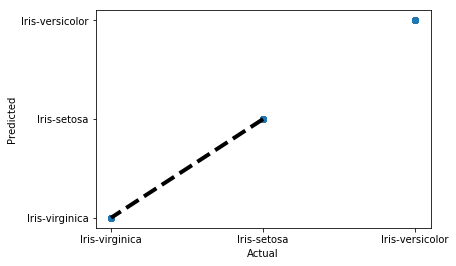

In [20]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()